# Wind Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv('wind.data',sep="\s+",parse_dates=[['Yr','Mo','Dy']])
x=pd.read_csv('wind.data',sep="\s+",parse_dates=[['Yr','Mo','Dy']])
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Yr_Mo_Dy  6574 non-null   datetime64[ns]
 1   RPT       6568 non-null   float64       
 2   VAL       6571 non-null   float64       
 3   ROS       6572 non-null   float64       
 4   KIL       6569 non-null   float64       
 5   SHA       6572 non-null   float64       
 6   BIR       6574 non-null   float64       
 7   DUB       6571 non-null   float64       
 8   CLA       6572 non-null   float64       
 9   MUL       6571 non-null   float64       
 10  CLO       6573 non-null   float64       
 11  BEL       6574 non-null   float64       
 12  MAL       6570 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 667.8 KB


### Year 2061? Do we really have data from this year? Fix it.

In [4]:
#data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].astype("string").apply(lambda x:'19'+x[2:])

In [5]:
def date_mod(x):
    year = x.year - 100 if x.year>2000 else x.year
    return datetime.date(year,x.month,x.day)
    

In [6]:
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(date_mod)
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Set the dates as the index.

In [7]:
data.set_index('Yr_Mo_Dy')


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [8]:
# inplace helps us to change in the original dataset

In [9]:
data.set_index('Yr_Mo_Dy',inplace=True)

### Compute how many values are missing for each location over the entire record.  

In [10]:
def missing(x):
    return pd.Series([x.isnull().sum()])

In [11]:
data._get_numeric_data().apply(lambda x: missing(x))

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,6,3,2,5,2,0,3,2,3,1,0,4


In [12]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Compute how many non-missing values there are in total.

In [13]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

### Calculate the mean windspeeds of the windspeeds over all the locations and all the times.


In [14]:
data.mean().mean()

10.227982360836924

### Create a DataFrame and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 



In [15]:
data.index=pd.to_datetime(data.index)

In [16]:
def loc(x):

    return pd.Series([x.mean(),x.max(),x.min(),x.std()],index=['Mean','Max','Min','Std'])

In [17]:
# loc_stats = pd.DataFrame({
#     'mean':data.mean(),
#     'max':data.max(),
#     'min':data.min(),
#     'Standard_deviation':data.std()
# })
#

loc_stats=data._get_numeric_data().apply(loc)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794



### Create a DataFrame and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.



In [18]:
day_stats=pd.DataFrame()

In [19]:
day_stats['mean']=data.mean(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['min']=data.min(axis=1)
day_stats['std']=data.std(axis=1)

In [20]:
day_stats
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


###  Find the average windspeed in January for each location.  


In [21]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [22]:
data.index=(pd.to_datetime(data.index))

In [23]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

###  Downsample the record to a yearly frequency for each location.

In [24]:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


### Draw a line graph for RPT in annual periot to analyze the mvovement of wind speed

<AxesSubplot:title={'center':'RPT wind '}, ylabel='WIND SPEED'>

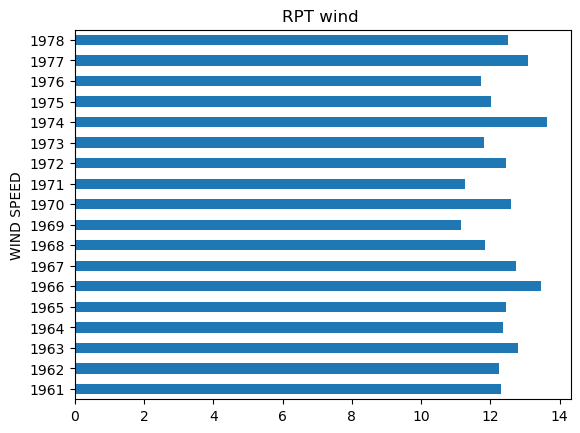

In [33]:
data.groupby(data.index.to_period("A"))['RPT'].mean().plot(kind='barh',title='RPT wind ',xlabel='WIND SPEED')

### Downsample the record to a monthly frequency for each location.

In [28]:
data.groupby(data.index.to_period('M')).mean()
data.resample("M").mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


### Downsample the record to a weekly frequency for each location.

In [29]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


<AxesSubplot:ylabel='Frequency'>

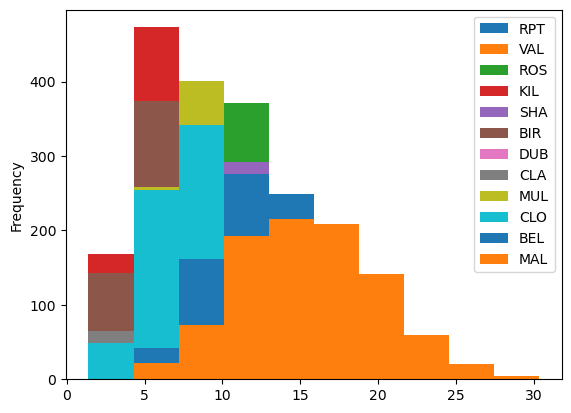

In [48]:
data.groupby(data.index.to_period('W')).mean().plot(kind='hist')

### Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [30]:
week = data.resample('W').aggregate(['min','max','std','mean'])
week.loc[week.index[1:53],'RPT':'MAL']

RPT                                VAL                   \
              min    max       std       mean    min    max       std   
Yr_Mo_Dy                                                                
1961-01-08  10.58  18.50  2.631321  13.541429   6.63  16.88  3.949525   
1961-01-15   9.04  19.75  3.555392  12.468571   3.54  12.08  3.148945   
1961-01-22   4.92  19.83  5.337402  13.204286   3.42  14.37  3.837785   
1961-01-29  13.62  25.04  4.619061  19.880000   9.96  23.91  5.170224   
1961-02-05  10.58  24.21  5.251408  16.827143   9.46  24.21  5.187395   
1961-02-12  16.00  24.54  3.587677  19.684286  11.54  21.42  3.608373   
1961-02-19   6.04  22.50  5.064609  15.130000  11.63  20.17  3.575012   
1961-02-26   7.79  25.80  7.020716  15.221429   7.08  21.50  5.147348   
1961-03-05  10.96  13.33  0.997721  12.101429   8.83  17.00  2.851955   
1961-03-12   4.88  14.79  3.732263   9.376667   8.08  16.96  3.230167   
1961-03-19   4.92  16.88  3.860036  11.911429   9.46  15.54  2.352867   
1961-03-26   6.29  15.00  3.613298   9.567143   2.58  11.63  3.657265   
1961-04-02   5.88  18.25  5.046922  10.757143   3.50  16.29  4.687315   
1961-04-09   4.50  18.12  4.604392  11.964286   7.04  14.62  2.845399   
1961-04-16   4.71  15.50  3.937727   8.965714   4.83  12.25  2.607118   
1961-04-23   4.00  21.09  5.676655  12.621429   3.71  15.41  4.631736   
1961-04-30   4.08  16.29  4.349662  10.117143   6.50  14.46  2.871425   
1961-05-07   9.87  23.00  5.025507  15.367143  10.29  19.79  3.750835   
1961-05-14   3.54  12.79  3.371022   7.772857   3.96  15.12  3.782947   
1961-05-21   4.88  15.04  3.631730   8.225714   3.58  10.17  2.468906   
1961-05-28   4.96  11.79  2.739433   8.155714   3.67  12.50  3.378537   
1961-06-04   7.00  15.92  3.099701  10.321429   4.75   9.79  1.868125   
1961-06-11   8.29  14.42  2.248597  10.917143   6.83  11.54  1.524836   
1961-06-18   6.13  14.33  3.009482  10.571429   4.12  14.54  3.509444   
1961-06-25   4.00   9.00  1.982035   7.345714   3.25   9.50  2.212460   
1961-07-02   7.21  13.13  2.557856  10.236667   6.34  14.37  2.902411   
1961-07-09   7.29  17.50  3.664855  11.715714   3.75  10.75  2.686658   
1961-07-16   8.63  22.50  5.168710  16.680000   7.87  19.29  3.849630   
1961-07-23   3.04   5.88  1.047978   4.202857   2.92   6.79  1.400010   
1961-07-30   6.13  16.08  4.157641  10.561429   4.63  13.79  3.203206   
1961-08-06   7.67  16.08  2.950887  10.870000   5.09  15.79  3.985226   
1961-08-13   2.88  14.21  4.422268  10.058333   4.42  10.00  2.053326   
1961-08-20  13.13  18.91  2.283635  15.607143   7.25  13.62  2.523416   
1961-08-27   7.67  18.16  3.395857  12.391429   6.87  14.58  3.174702   
1961-09-03   3.63  14.46  4.398615   8.678571   1.13  22.00  7.474025   
1961-09-10   5.00  17.62  5.207278  10.541429   3.04  13.59  4.003996   
1961-09-17   5.33  28.75  7.679190  17.160000   7.12  22.08  5.360585   
1961-09-24   6.92  10.25  1.267399   8.500000   2.92  13.62  3.445262   
1961-10-01  10.34  23.21  4.559572  16.044286   6.96  13.62  2.812482   
1961-10-08   3.13  16.08  5.596710  11.250000   3.63  16.96  5.060803   
1961-10-15   3.71  17.12  4.780675  10.881667   6.13  13.25  2.707483   
1961-10-22  10.46  28.62  7.888314  19.260000   3.75  19.46  5.998199   
1961-10-29   4.33  26.42  7.957637  16.077143   2.75  21.25  6.879973   
1961-11-05   5.88  15.79  3.369201  11.571429   3.96  13.46  3.900278   
1961-11-12   5.46  16.08  3.939811  10.428571   5.50  10.75  2.141191   
1961-11-19   7.50  15.00  2.784358  10.798571   4.21  13.00  3.208548   
1961-11-26   5.75  14.29  3.214368   9.154286   3.29  11.79  3.277904   
1961-12-03   7.92  23.75  5.704669  12.608571   4.67  18.71  5.107089   
1961-12-10  10.83  23.71  4.890152  17.362857   9.21  21.37  4.115506   
1961-12-17   9.29  21.34  4.095106  14.985714   8.63  17.62  3.587886   
1961-12-24  11.46  24.41  4.959717  15.757143   9.79  16.13  2.220866   
1961-12-31   5.04  20.54  5.787783  13.634286   3.08  16.04  4.566479   

In [ ]:
Ploting histogram for analysing the frewuency of windspeed for each 

<AxesSubplot:ylabel='Frequency'>

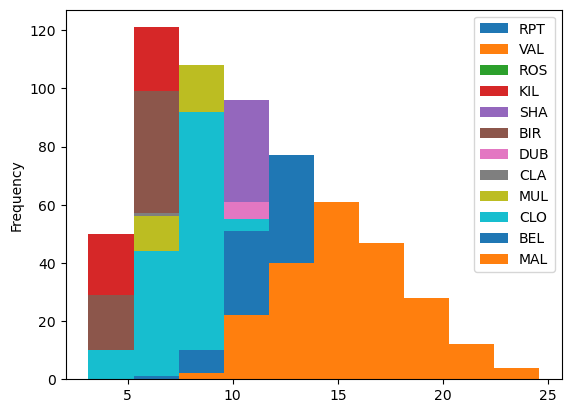

In [49]:
data.resample("M").mean().plot(kind='hist')

<AxesSubplot:ylabel='Yr_Mo_Dy'>

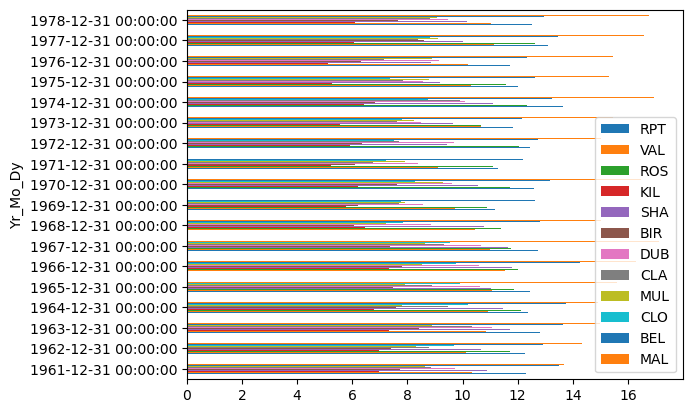

In [79]:
data.resample("A").mean().plot(kind='barh')